<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     20 non-null     int64 
 1   order_date   20 non-null     object
 2   customer_id  20 non-null     object
 3   product      20 non-null     object
 4   category     20 non-null     object
 5   quantity     20 non-null     int64 
 6   unit_price   20 non-null     int64 
 7   revenue      20 non-null     int64 
 8   region       20 non-null     object
dtypes: int64(4), object(5)
memory usage: 1.5+ KB


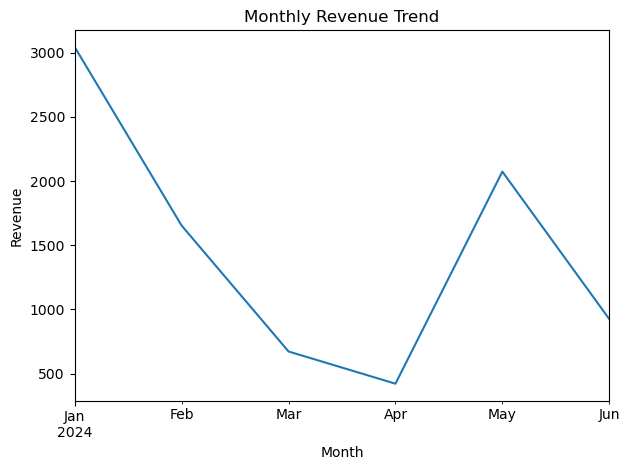

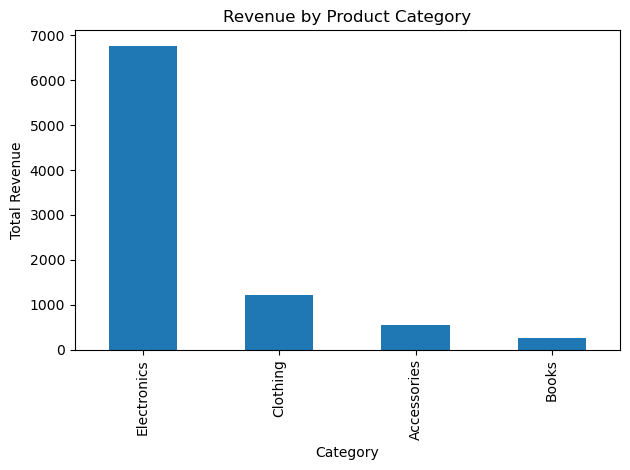

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'/Users/samsmac/Downloads/retail_sales-2.csv')
# Basic inspection
df.head()
df.info()

# Convert date column
df['order_date'] = pd.to_datetime(df['order_date'])

# Monthly revenue analysis
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()

# Plot revenue trend
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Category-level revenue analysis
category_revenue = (
    df.groupby('category')['revenue']
      .sum()
      .sort_values(ascending=False)
)

# Plot category performance
category_revenue.plot(
    kind='bar',
    title='Revenue by Product Category'
)

plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

